# Travel Time Estimation

## ETA (Estimated Time of Arrival)

## ETD (Estimated Time of Departure)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()


,runDate,stations,trainCode,trainStationId,scheduledArrival,scheduledDeparture,actualArrival,actualDeparture,distance,dayCount,ArrivalDelay,DepartureDelay
0,2020-01-01,FZR,12138,2657812,NaN,2020-01-01 21:40:00,2020-01-01 00:00:00,2020-01-01 21:40:00,0,0,0,0
1,2020-01-01,FDK,12138,2659393,2020-01-01 22:05:00,2020-01-01 22:07:00,2020-01-01 22:16:00,2020-01-01 22:18:00,32,0,11,11
2,2020-01-01,KKP,12138,2658108,2020-01-01 22:23:00,2020-01-01 22:25:00,2020-01-01 22:37:00,2020-01-01 22:38:00,45,0,14,13
3,2020-01-01,GJUT,12138,2734206,2020-01-01 22:38:00,2020-01-01 22:40:00,2020-01-01 22:56:00,2020-01-01 22:57:00,61,0,18,17
4,2020-01-01,GNA,12138,2742572,2020-01-01 22:54:00,2020-01-01 22:56:00,2020-01-01 23:14:00,2020-01-01 23:15:00,76,0,20,19


In [4]:
print(train.shape)

(31875, 12)


In [5]:
test.head()

,runDate,stations,trainId,trainCode,index,trainStationId,scheduledArrival,scheduledDeparture,distance,dayCount,day
0,2020-02-20,FZR,11528,12138,1,2657812,NaN,2020-02-20 21:40:00,0,0,Thursday
1,2020-02-20,FDK,11528,12138,2,2659393,2020-02-20 22:05:00,2020-02-20 22:07:00,32,0,Thursday
2,2020-02-20,KKP,11528,12138,3,2658108,2020-02-20 22:23:00,2020-02-20 22:25:00,45,0,Thursday
3,2020-02-20,GJUT,11528,12138,4,2734206,2020-02-20 22:38:00,2020-02-20 22:40:00,61,0,Thursday
4,2020-02-20,GNA,11528,12138,5,2742572,2020-02-20 22:54:00,2020-02-20 22:56:00,76,0,Thursday


In [6]:
test.shape

(695, 11)

In [7]:
test.columns

Index(['runDate', 'stations', 'trainId', 'trainCode', 'index',
       'trainStationId', 'scheduledArrival', 'scheduledDeparture', 'distance',
       'dayCount', 'day'],
      dtype='object')

In [8]:
train.columns

Index(['runDate', 'stations', 'trainCode', 'trainStationId',
       'scheduledArrival', 'scheduledDeparture', 'actualArrival',
       'actualDeparture', 'distance', 'dayCount', 'ArrivalDelay',
       'DepartureDelay'],
      dtype='object')

### Missing Columns 
1. Train ID 
2. Index
3. Actual Arrival 
4. Actual Departure 
5. Day 
6. Arrival Delay 
7. Departure Delay

In [9]:
## Counting and Removing NA values 
train.isna().sum()



runDate                 0
stations                0
trainCode               0
trainStationId          0
scheduledArrival      691
scheduledDeparture    778
actualArrival           0
actualDeparture       100
distance                0
dayCount                0
ArrivalDelay            0
DepartureDelay          0
dtype: int64

In [10]:
test.isna().sum()

runDate                0
stations               0
trainId                0
trainCode              0
index                  0
trainStationId         0
scheduledArrival      15
scheduledDeparture    17
distance               0
dayCount               0
day                    0
dtype: int64

In [11]:
## Percentage of missing values in each column

missing_values = pd.DataFrame({c:(train[c].isna().sum()/len(train))*100 for c in train.columns},index=["% missing values in train"])
missing_values = missing_values.append(pd.DataFrame({c:(test[c].isna().sum()/len(test))*100 for c in test.columns},index=["% missing values in test"]))
missing_values

,runDate,stations,trainCode,trainStationId,scheduledArrival,scheduledDeparture,actualArrival,actualDeparture,distance,dayCount,ArrivalDelay,DepartureDelay,trainId,index,day
% missing values in train,0.0,0.0,0.0,0.0,2.167843,2.440784,0.0,0.313725,0.0,0.0,0.0,0.0,NaN,NaN,NaN
% missing values in test,0.0,0.0,0.0,0.0,2.158273,2.446043,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0


### Imputing and Dropping NA values

We can easily remove all the NA values but after careful filter rows inspection, it has come to our notice that stations like "CSMT" would have no data point left. Hence we cannot simply drop the data we have to impute the data after checking the values from "ArrivalDelay" and "DepartureDelay". 

NA Values in 
SELECT NA values
1. scheduledArrival = 

In [12]:
## Converting to date time

train['scheduledArrival'] = pd.to_datetime(train['scheduledArrival'])
train['scheduledDeparture'] = pd.to_datetime(train['scheduledDeparture'])
train['actualArrival'] = pd.to_datetime(train['actualArrival'])
train['actualDeparture'] = pd.to_datetime(train['actualDeparture'])
test['scheduledArrival'] = pd.to_datetime(test['scheduledArrival'])
test['scheduledDeparture'] = pd.to_datetime(test['scheduledDeparture'])


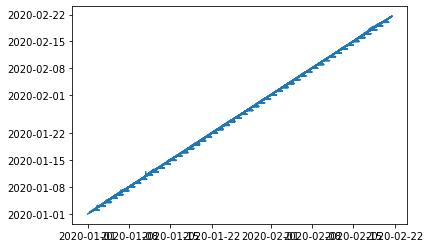

In [13]:
plt.plot(train['scheduledArrival'], train['actualArrival'])

In [14]:
train


,runDate,stations,trainCode,trainStationId,scheduledArrival,scheduledDeparture,actualArrival,actualDeparture,distance,dayCount,ArrivalDelay,DepartureDelay
0,2020-01-01,FZR,12138,2657812,NaT,2020-01-01 21:40:00,2020-01-01 00:00:00,2020-01-01 21:40:00,0,0,0,0
1,2020-01-01,FDK,12138,2659393,2020-01-01 22:05:00,2020-01-01 22:07:00,2020-01-01 22:16:00,2020-01-01 22:18:00,32,0,11,11
2,2020-01-01,KKP,12138,2658108,2020-01-01 22:23:00,2020-01-01 22:25:00,2020-01-01 22:37:00,2020-01-01 22:38:00,45,0,14,13
3,2020-01-01,GJUT,12138,2734206,2020-01-01 22:38:00,2020-01-01 22:40:00,2020-01-01 22:56:00,2020-01-01 22:57:00,61,0,18,17
4,2020-01-01,GNA,12138,2742572,2020-01-01 22:54:00,2020-01-01 22:56:00,2020-01-01 23:14:00,2020-01-01 23:15:00,76,0,20,19
...,...,...,...,...,...,...,...,...,...,...,...,...
31870,2020-02-19,PGW,12925,2658284,2020-02-20 17:19:00,2020-02-20 17:21:00,2020-02-20 18:39:00,2020-02-20 18:41:00,1723,1,80,80
31871,2020-02-19,JRC,12925,2657701,2020-02-20 17:37:00,2020-02-20 17:39:00,2020-02-20 19:04:00,2020-02-20 19:06:00,1739,1,87,87
31872,2020-02-19,JUC,12925,2657676,2020-02-20 17:53:00,2020-02-20 17:58:00,2020-02-20 19:15:00,2020-02-20 19:30:00,1744,1,82,92
31873,2020-02-19,BEAS,12925,2658299,2020-02-20 18:30:00,2020-02-20 18:32:00,2020-02-20 19:58:00,2020-02-20 20:00:00,1780,1,88,88


In [26]:
train['scheduledTravelTime'] = pd.DataFrame(train['scheduledDeparture'] - train['scheduledArrival'])
# train['scheduledTravelTime'] = train['scheduledTravelTime'].total_seconds()

train['scheduledTravelTime']

0            NaT
1       00:02:00
2       00:02:00
3       00:02:00
4       00:02:00
          ...   
31870   00:02:00
31871   00:02:00
31872   00:05:00
31873   00:02:00
31874        NaT
Name: scheduledTravelTime, Length: 31875, dtype: timedelta64[ns]

In [16]:
train['actualTravelTime'] = train['actualDeparture'] - train['actualArrival']
train

NameError: name 'EJo' is not defined

In [20]:
## Expected Journey Time

EJo = train['scheduledDeparture'] - train['scheduledArrival']

# print(ExpectedJourney)

# timeDiff = pd.DataFrame()
# ExpectedJourney = timeDiff.apply(
#     lambda x: f'{x.components.hours:02d}:{x.components.minutes:02d}:{x.components.seconds:02d}'
#               if not pd.isnull(x) else ''
# )
EJo.to_string()
print(EJo.shape)
for i in range(EJo.shape[0]):
    print(EJo[i])
    # ExpectedJourney.drop(i)

print(EJo.shape)

import datetime

# date_time_str = '2018-06-29 08:15:27.243860'

date_time = pd.DataFrame()
for row in EJo:
    date_time.append(datetime.datetime.strptime(row, '%H:%M:%S'))


date_time.head()
# print('Date:', date_time_obj.date())
# print('Time:', date_time_obj.time())
# print('Date-time:', date_time_obj)

TypeError: unsupported type for timedelta days component: Series

In [ ]:
import plotly.express as px

px.scatter(x = train['ArrivalDelay'], y = train['DepartureDelay'] )


# plt.scatter(train['ArrivalDelay'], train['DepartureDelay'], 'ro')

In [ ]:
## Plots

fig,axes = plt.subplots(nrows=9,ncols=3,figsize=(15,150))

for i in range(9,36):
    sns.distplot(train.iloc[:,i],ax=axes[(i-9)//3,(i-9)%3])